In [1]:
import os
from glob import glob
import random

from tflearn import DNN
from tflearn.datasets import mnist
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import fully_connected, input_data, dropout
from tflearn.layers.estimator import regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [2]:
LOG_DIR = '/tmp/cypsio/'
DATA_DIR = '../data/images_letters_normalized_cleaned_together/'
TENSORBOARD_DIR = os.path.join(LOG_DIR, 'tensorboard')
CHECKPOINT_PATH = os.path.join(LOG_DIR, 'checkpoint')
MODEL_FILE = os.path.join(LOG_DIR, 'model_weights')

In [3]:
labels = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

In [4]:
def load_data(data_dir, size=.8):
    x = []
    y = []
    files = glob(os.path.join(data_dir, '*'))
    random.shuffle(files)
    for i in files:
        img = cv2.imread(i, 0)
        img_label = np.zeros(len(labels))
        img_label[labels.index(os.path.basename(i).split('_')[0])] = 1
        x.append(img)
        y.append(img_label)
    n = int(len(x) * size)
    x = np.array(x)
    y = np.array(y)
    return x[:n], y[:n], x[n:], y[n:]

In [5]:
train_x, train_y, test_x, test_y = load_data(DATA_DIR)

train_x = train_x.reshape([-1, 64, 64, 1])
test_x = test_x.reshape([-1, 64, 64, 1])

train_x.shape

(36586, 64, 64, 1)

In [6]:
net_input = input_data(shape=[None, 64, 64, 1])

conv1 = conv_2d(net_input, nb_filter=4, filter_size=5, strides=[1, 1, 1, 1], activation='relu')
max_pool1 = max_pool_2d(conv1, kernel_size=2)

conv2 = conv_2d(max_pool1, nb_filter=8, filter_size=5, strides=[1, 2, 2, 1], activation='relu')
max_pool2 = max_pool_2d(conv2, kernel_size=2)

conv3 = conv_2d(max_pool2, nb_filter=12, filter_size=4, strides=[1, 1, 1, 1], activation='relu')
max_pool3 = max_pool_2d(conv3, kernel_size=2)

fc1 = fully_connected(max_pool3, n_units=200, activation='relu')
drop1 = dropout(fc1, keep_prob=.5)

fc2 = fully_connected(drop1, n_units=36, activation='softmax')
net = regression(fc2)

In [7]:
model = DNN(network=net,
            tensorboard_dir=TENSORBOARD_DIR,
            tensorboard_verbose=3,
            best_checkpoint_path=CHECKPOINT_PATH,
           )

In [8]:
model.load(model_file=MODEL_FILE)

INFO:tensorflow:Restoring parameters from /tmp/cypsio/model_weights


('8', 'B', 555, 206)

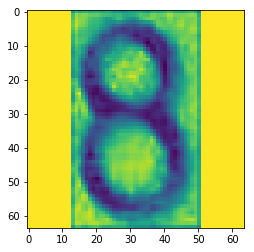

In [9]:
import random

ok = 1;
num = 0
while ok:
    n = random.randrange(test_x.shape[0])
    x = train_x[n, ...]
    plt.imshow(x.reshape(64, 64))

    y = np.argmax(train_y[n])
    y_pred = np.argmax(model.predict(x.reshape([1, 64, 64, 1])))

    ok = y == y_pred
    num += 1

labels[y], labels[y_pred], n, num